# Hackathon Reddit Sentiment Analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import re
from bs4 import BeautifulSoup   
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS as stopwords

In [143]:
# read data
events = pd.read_csv('../data/events_reddit.csv')

In [144]:
events.head()

,author,body,created_utc,subreddit,permalink,timestamp
0,DjMagicTouch,You're thinking in extremes man. Just like eve...,1590177465,Coronavirus,/r/Coronavirus/comments/gojqi1/daily_discussio...,2020-05-22
1,lisaseileise,"No, what is so hard to understand here? It‘s j...",1590177616,Coronavirus,/r/Coronavirus/comments/gonje6/the_coronavirus...,2020-05-22
2,jeopardy987987,"it's killed nearly 100,000 in the US in just a...",1590177796,Coronavirus,/r/Coronavirus/comments/gokm4t/a_majority_of_a...,2020-05-22
3,gp_dude,You are living in an alternate reality if you ...,1590177806,Coronavirus,/r/Coronavirus/comments/goql7x/sweden_escapes_...,2020-05-22
4,gp_dude,"No, it's not accurate, that's what the officia...",1590178095,Coronavirus,/r/Coronavirus/comments/goql7x/sweden_escapes_...,2020-05-22


In [158]:
remove = ['against','enough','only','no','not']
append = ['like','don','gt','https','www','scmp','com','x200b','2020', 'does','did']

In [159]:
custom_stops = list(stopwords)
for word in remove:
    custom_stops.remove(word)
for word in append:
    custom_stops.append(word)

In [160]:
stripped_comments = []

for comment in events['body']:
    letters_only = re.sub("[^a-zA-Z]"," ", comment)
    words = letters_only.lower().split()
    meaningful_words = [w for w in words if w not in custom_stops] 
    new_body = " ".join(meaningful_words)
    stripped_comments.append(new_body)

events['stripped'] = stripped_comments

In [161]:
cvec = CountVectorizer(stop_words=custom_stops, ngram_range=(2,4))
X_text = events['body']
X_text = cvec.fit_transform(X_text)
X_text_df = pd.DataFrame(X_text.toarray(), columns = cvec.get_feature_names())

In [162]:
top20words = X_text_df.sum().sort_values(ascending=False)[:20]

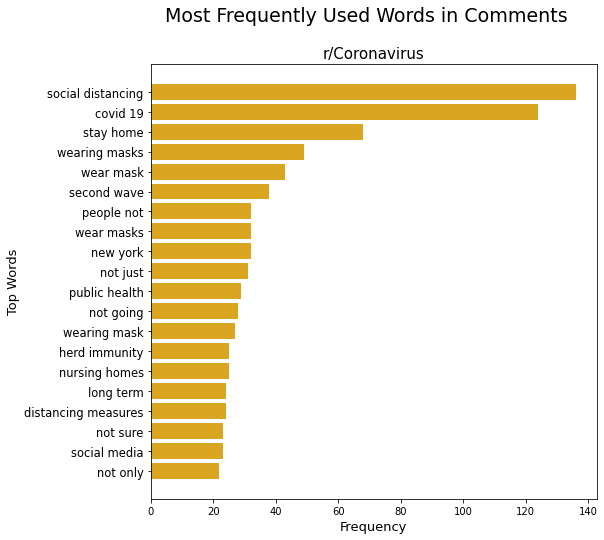

In [163]:
plt.figure(figsize=(8,8))
plt.barh(y=top20words.index[::-1],width=top20words[::-1],color='goldenrod')
plt.suptitle('Most Frequently Used Words in Comments',size=19)
plt.title('r/Coronavirus',size=15)
plt.xlabel('Frequency',size=13)
plt.ylabel('Top Words',size=13)
plt.yticks(size=11.5);